In [1]:
import pandas as pd
movies = pd.read_csv('D:/bigdata/note/project/ml-25m/movies.csv')
ratings = pd.read_csv('D:/bigdata/note/project/ml-25m/ratings.csv')

In [2]:
print(movies.isna().sum())
print(ratings.isna().sum())
print(tags.isna().sum())

movieId    0
title      0
genres     0
dtype: int64
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [3]:
tags.dropna(axis=0, how='any', inplace=True)

In [5]:
ratings_m = ratings.groupby(['movieId'])['rating'].mean()
ratings_m = pd.DataFrame(ratings_m).reset_index()
movies_1 = pd.merge(movies, ratings_m, on=['movieId'])
movies_1.head(10)
                # 위에서는 처음 ['rating'].mean()을 merge할 때 rating열이 없었으므로 필드명이 그대로 삽입되었지만
                # 이후 [rating'].count()가 추가되면 rating이라는 필드명이 중복되기 때문에 rating_x, rating_y로 자동 변형되는듯
                     # >=25번 이상 발생이라는 제한유무와 무관한듯?

,movieId,rating
0,1,3.893708
1,2,3.251527
2,3,3.142028
3,4,2.853547
4,5,3.058434
...,...,...
59042,209157,1.500000
59043,209159,3.000000
59044,209163,4.500000
59045,209169,3.000000


In [ ]:
# movies DataFrame에 62423개의 movieId가 존재 vs ratings DataFrame을 .groupby[('movieId')]했을 때 59047가 반환

In [6]:
# 시도4
import pandas as pd
movies_1['released'] = movies_1['title'].str.extract(r'(\d{4})')
# r_year = movies_1['title'].str.extract(r'(\d{4})')
# print(r_year.isnull().sum())
# print(r_year)
# print(r_year.info()) # 널값이 있지만 아직 제거하지 않을것임.

In [8]:
movies_1.head()

,movieId,title,genres,rating,released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995


<b><font size="6" color="red">1. rating평균값과 released가 포함된 movies_1 도출----------기본값</font></b>

In [7]:
# counts를 추가하기 위해
# 위에서는 grouped_ratings = ratings.groupby(['movieId'])['rating'].mean()
ratings_c = ratings.groupby('movieId')['rating'].count()
ratings_c

movieId
1         57309
2         24228
3         11804
4          2523
5         11714
          ...  
209157        1
209159        1
209163        1
209169        1
209171        1
Name: rating, Length: 59047, dtype: int64

In [8]:
# (1) ratings_count.columns = ['movieId', 'counts'] # 두 번 실행하면 안됨.
ratings_c = pd.DataFrame(ratings_c).reset_index()
    # 실행하기전에 ratings_count가 dataframe이어야 함.(series이면 오류도 안나고 그냥 적용이 안됨)
# (1) -> (2)
ratings_c = ratings_c.rename({'rating':'counts'},axis=1)
ratings_c # rename과 유사한 기능하는 다른 함수들 찾아보기!!!

,movieId,counts
0,1,57309
1,2,24228
2,3,11804
3,4,2523
4,5,11714
...,...,...
59042,209157,1
59043,209159,1
59044,209163,1
59045,209169,1


In [12]:
movies_2 = pd.merge(movies_1, ratings_c, on=['movieId'])
movies_2.head(10)
            # movies_2 : rating을 20번 이상 받은 영화집합의 rating순 데이터프레임

,movieId,title,genres,rating,released,counts
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995,57309
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995,24228
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995,11804
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995,2523
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995,11714
5,6,Heat (1995),Action|Crime|Thriller,3.854909,1995,24588
6,7,Sabrina (1995),Comedy|Romance,3.363666,1995,12132
7,8,Tom and Huck (1995),Adventure|Children,3.114583,1995,1344
8,9,Sudden Death (1995),Action,2.992051,1995,3711
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.421458,1995,28265


In [22]:
movies_2.count()

movieId     16970
title       16970
genres      16970
rating      16970
released    16944
counts      16970
dtype: int64

In [14]:
import numpy as np
movies_2['counts'].max()

81491

In [14]:
movies_2 = movies_2.sort_values(by='counts', ascending=False, ignore_index=True)
movies_2.head()

,movieId,title,genres,rating,released,counts
0,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491
1,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
2,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672
3,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127
4,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674


<b><font size="6" color="red"> movies_2 : movies_1에서 counts발생시키고 counts기준으로 정렬 -> fn3으로 이용 ----------</font></b>

In [ ]:
ratings_c = ratings.groupby('movieId')['rating'].count()
ratings_c = pd.DataFrame(ratings_c).reset_index()
ratings_c = ratings_c.rename({'rating':'counts'},axis=1)
# 평점이 25회이상 부여된 영화들
ratings_c = ratings_c[ratings_c['counts']>=25]

In [19]:
movies_3 = pd.merge(movies_1, ratings_c, on='movieId')
movies_3 = movies_3.sort_values(by='rating', ascending=False, ignore_index=True)
movies_3.head()

,movieId,title,genres,rating,released,counts
0,171011,Planet Earth II (2016),Documentary,4.483096,2016,1124
1,159817,Planet Earth (2006),Documentary,4.464797,2006,1747
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482
3,170705,Band of Brothers (2001),Action|Drama|War,4.398599,2001,1356
4,171495,Cosmos,(no genres listed),4.326715,NaN,277


<b><font size="6" color="red"> movies_3 : movies_1에서 counts>25 조건적용 시키고 ratings 기준으로 정렬 -> fn4으로 이용 ----------</font></b>

In [20]:
movies_1.head()

,movieId,title,genres,rating,released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.893708,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.251527,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.142028,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.853547,1995
4,5,Father of the Bride Part II (1995),Comedy,3.058434,1995


In [63]:
ratings_c = ratings.groupby(['movieId'])['rating'].count()
ratings_c = ratings_c.reset_index()
ratings_c = ratings_c.rename({'rating':'counts'},axis=1) # rating을 count로 이름 바꿔줌
movies_4 = pd.merge(movies_1, ratings_c, on='movieId')

<AxesSubplot:xlabel='released', ylabel='counts'>

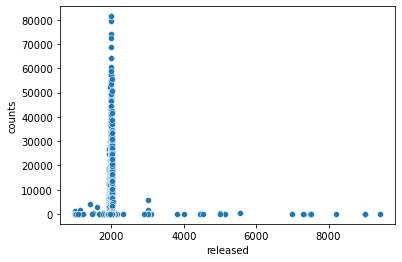

In [64]:
movies_4.dropna(axis=0, how='any' ,inplace=True)
movies_4['released'] = movies_4['released'].astype('int64')
import seaborn as sns
sns.scatterplot(data=movies_4, x = 'released', y='counts')

<AxesSubplot:xlabel='released', ylabel='counts'>

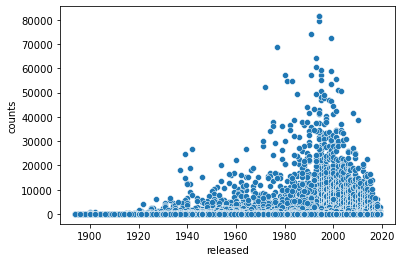

In [65]:
movies_4 = movies_4[(movies_4['released']>=1894) & (movies_4['released']<=2019)]
import seaborn as sns
sns.scatterplot(data=movies_4, x = 'released', y='counts')

In [77]:
movies_4['released'] = movies_4['released'].astype('int64')
movies_4['value'] = movies_4['rating'] + movies_4['counts']/movies_4['counts'].max()*5 + (movies_4['released']-movies_4['released'].min())/(movies_4['released'].max()-movies_4['released'].min())*3 
movies_4 = movies_4.sort_values(by='value', ignore_index=True, ascending=False)
movies_4.head(10)

,movieId,title,genres,rating,released,counts,value
0,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.413576,1994,81482,11.813024
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.188912,1994,79672,11.477305
2,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.048011,1994,81491,11.448011
3,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.154099,1999,72674,11.133119
4,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151342,1991,74127,11.027513
5,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.228311,1999,58773,10.354414
6,527,Schindler's List (1993),Drama|War,4.247579,1993,60411,10.330185
7,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120189,1977,68717,10.328421
8,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.284353,1995,55366,10.105415
9,4993,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,4.091189,2001,55736,10.078953


<b><font size="6" color="red"> movies_4 : rating + counts + 조정치 완성 -> fn1에 사용 가능 ----------</font></b>

In [ ]:
# 최근 영화는 평가수가 많을 수가 없는 구조인듯?
# 어떤 지표를 개발할지에 대한 고민이 필요함 -> 평가횟수 최소 30개 이상 + 스케일조정 실시

In [20]:
# 1,2 실행의 결과와 3 실행의 결과가 달라 break가 있는 경우와 없는 경우의 효과를 확인해볼 수 있음!
def main():
    
    while True:
        print("1:추천영화 | 2:인기영화 | 3:연도별 고평점 영화 | 4:실시간 트렌드(관객평) | 5: 나의 선호 | 9:종료",sep='|')
        fn = int(input('메뉴선택 : '))
        if fn == 1:
            fn1_movie_recommend()
        elif fn == 2:
            fn2_high_counts_movies()
        elif fn == 3:
            try:
                year = int(input("희망하는 연도를 4자리 숫자로 입력해주세요 : "))
                fn3_top_rated_movies(year)
                break
#                 if year >= 1900 and year <= 2020:
#                     movie_by_year(year)
#                 elif len(year) != 4:
#                     print("네 자리로 입력해주세요 ")
#                     break
#             except ValueError:
#                 print("유효한 정수가 아닙니다")
            except Exception as e:
                print(e)
        elif fn == 4:
            fn4_real_time_search()
            break
        elif fn == 9:
            fn9_end()
            break

def fn1_movie_recommend():
    print(movies_4['title'].head(10))
                # movies_3은 rating(5점 만점) + counts(5점 만점)을 합산한 값인 value 기준으로 정렬

def fn2_multiple_conditions(gen, year):
    print(movies_4.loc[movies_4['genres'].str.contains(gen, case=False) & (movies_4['released'] == int(year))])
    
def fn3_top_counts_movies():
    print(movies_3['title'].head(10))
                # movies_2 : rating을 10번 이상 받은 영화집합의 rating순 데이터프레임

def fn4_top_rating_movies():
    print(movies_4['title'].head(10))
    
def fn5_real_time_search():
    from selenium import webdriver
    import requests, re, urllib
    import time
    dv = webdriver.Chrome('D:/bigdata/download/chromedriver_win32/chromedriver.exe')
    url = 'https://movie.naver.com/movie/point/af/list.naver'
    dv.get(url) # url에 해당하는 페이지가 open

    for i in range(1,20):
        page_btn = dv.find_element_by_css_selector('div.paging a:nth-child(' + str(i) + ') > span') # 이 부분이 해결되어야 함!!!
        page_btn.click()
        time.sleep(1)

        target = urllib.request.urlopen("https://movie.naver.com/movie/point/af/list.naver?&page="+str(i))
        contents = target.read().decode('utf-8')
        crude = re.findall(r'<span class="st_on".+?<a href="#"', contents, re.DOTALL)

        i = i + 1
        ready_to_print = " "
        for c in crude:
            ready = re.search(r'<br>(.+)\n\t\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t\n\t\t\t\t<a href="#"', c)
            ready_to_print += ready.group(1)

        with open('D:/bigdata/note/project/movie_comments.txt', 'a', encoding='utf-8') as f:
            f.write(ready_to_print)

    #########################################################################################################################

    from konlpy.tag import Kkma
    kkma = Kkma(max_heap_size=1024)

    target = open('D:/bigdata/note/project/movie_comments.txt', encoding = 'utf-8').read()
    word_list = kkma.pos('%r' % target)
    word_list = [t[0] for t in word_list if t[1]=='NNG']
    text = ' '.join(word_list)

    from wordcloud import WordCloud # 클래스이므로 대문자
    from wordcloud import STOPWORDS
    import matplotlib.pyplot as plt # import matplotlib as plt로 하면 에러발생
    from PIL import Image
    import numpy as np
    img = Image.open('D:/bigdata/src/09_자연어처리/twitter-computer-black-icons-free-frame.png').convert('RGBA')
    mask = np.array(img)

    불용어 = set(['영화', '연기', '배우'])
    wc = WordCloud(background_color = 'white',
                  max_words=300,
                  font_path = 'C:/Windows/Fonts/한컴산뜻돋움/HanSantteutDotumBold.ttf',
                  relative_scaling = 0.5,
                  stopwords = 불용어,
                  mask=mask)

    wc.generate(text) # 워드 클라우드 생성
    plt.figure(figsize=(12,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    
def fn9_end():
    pass
                # 9. 종료하기

In [21]:
if __name__ == '__main__':
    main()

1:추천영화 | 2:인기영화 | 3:연도별 고평점 영화 | 4:실시간 트렌드(관객평) | 5: 나의 선호 | 9:종료
메뉴선택 : 1
0                     Shawshank Redemption, The (1994)
1                                  Pulp Fiction (1994)
2                                  Forrest Gump (1994)
3                     Silence of the Lambs, The (1991)
4                                   Matrix, The (1999)
5            Star Wars: Episode IV - A New Hope (1977)
6                              Schindler's List (1993)
7                                    Fight Club (1999)
8                           Usual Suspects, The (1995)
9    Star Wars: Episode V - The Empire Strikes Back...
Name: title, dtype: object
1:추천영화 | 2:인기영화 | 3:연도별 고평점 영화 | 4:실시간 트렌드(관객평) | 5: 나의 선호 | 9:종료
메뉴선택 : 2
0              Planet Earth II (2016)
1                 Planet Earth (2006)
2    Shawshank Redemption, The (1994)
3             Band of Brothers (2001)
4                              Cosmos
5               Godfather, The (1972)
6               Blue Planet II (2017)
7      